In [1]:
import wave_view as wv
import numpy as np


In [2]:
from test_all import *

test_op()
test_dc()
test_ac()
test_tran()

Running ngspice in /foss/designs/simulations/tb_ota_5t/test_op
Running ngspice in /foss/designs/simulations/tb_ota_5t/test_dc
Running ngspice in /foss/designs/simulations/tb_ota_5t/test_ac
Running ngspice in /foss/designs/simulations/tb_ota_5t/test_tran


Total signals: 15
  - v(v-sweep)
  - v(i_bias)
  - v(in)
  - v(in_n)
  - v(in_p)
  - v(out)
  - i(v_jumper_fb)
  - i(v_jumper_in)
  - i(v_src)
  - i(v_vdda)
  - i(v_vssa)
  - v(vdda)
  - v(vssa)
  - v(x1.net1)
  - v(x1.net2)


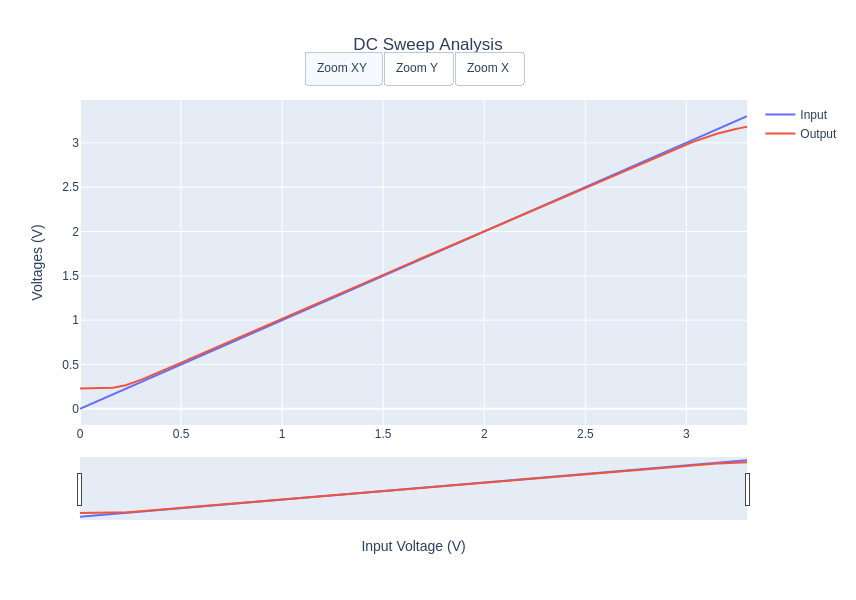

In [3]:
spice_file = "/foss/designs/simulations/tb_ota_5t/test_dc/results.raw"

data = wv.load_spice(spice_file)

print(f"Total signals: {len(data.signals)}")
for signal in data.signals:
    print(f"  - {signal}")


# Now proceed with plotting using YAML configuration
custom_config = wv.config_from_yaml("""
title: "DC Sweep Analysis"

X:
  signal_key: "v(v-sweep)"
  label: "Input Voltage (V)"

Y:
  - label: "Voltages (V)"
    signals:
      Input: "v(in)"
      Output: "v(out)"

plot_height: 600
show_zoom_buttons: true
show_rangeslider: true
""")

fig1 = wv.plot(spice_file, custom_config, show=True)

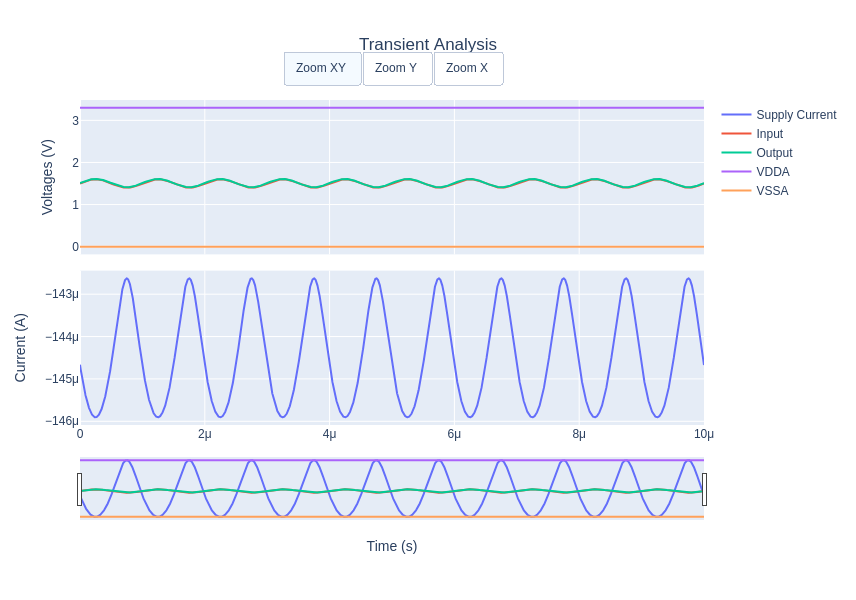

In [4]:

spice_file = "/foss/designs/simulations/tb_ota_5t/test_tran/results.raw"

data = wv.load_spice(spice_file)

# print(f"Total signals: {len(data.signals)}")
# for signal in data.signals:
#     print(f"  - {signal}")


# Now proceed with plotting using YAML configuration
custom_config = wv.config_from_yaml("""
title: "Transient Analysis"

X:
  signal_key: "time"
  label: "Time (s)"

Y:
  - label: "Voltages (V)"
    signals:
      Input: "v(in)"
      Output: "v(out)"
      VDDA: "v(vdda)"
      VSSA: "v(vssa)"
      
  - label: "Current (A)"
    signals:
      Supply Current: "i(v_vdda)"

plot_height: 600
show_zoom_buttons: true
show_rangeslider: true
""")

fig1 = wv.plot(spice_file, custom_config, show=True)


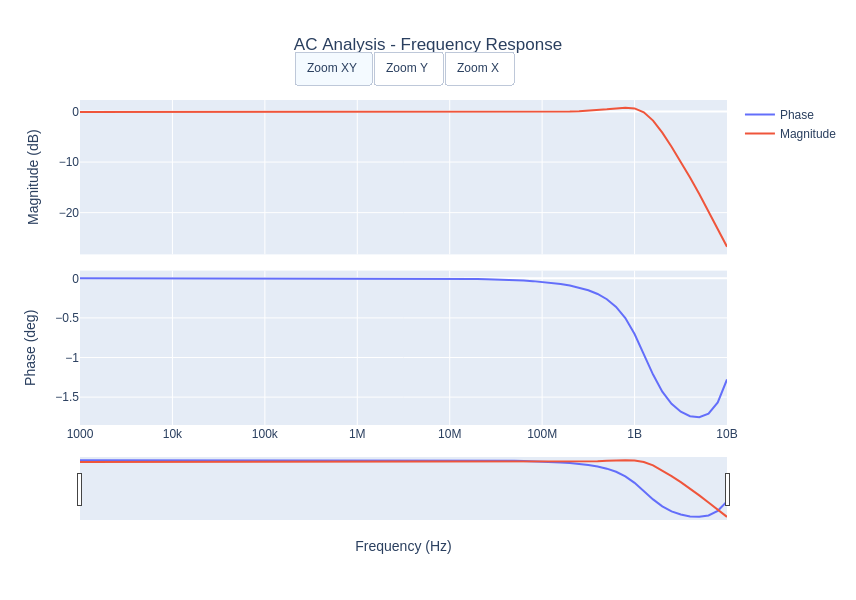

In [7]:
spice_file = "/foss/designs/simulations/tb_ota_5t/test_ac/results.raw"

data = wv.load_spice(spice_file)

#print(f"Total signals: {len(data.signals)}")
#for signal in data.signals:
#    print(f"  - {signal}")

processed_data = {
    "tf_db" : 20*np.log10(np.abs(data.get_signal("v(out)"))),
    "tf_phase" : np.angle(data.get_signal("v(out)"))
}

# Now proceed with plotting using YAML configuration
custom_config = wv.config_from_yaml("""
title: "AC Analysis - Frequency Response"

X:
  signal_key: "frequency"
  label: "Frequency (Hz)"
  scale: "log"
                                    
Y:
  - label: "Magnitude (dB)"
    signals:
      Magnitude: "data.tf_db"
  - label: "Phase (deg)"
    signals:
      Phase: "data.tf_phase"

                                    
plot_height: 600
show_zoom_buttons: true
show_rangeslider: true
""")

fig2 = wv.plot(spice_file, config=custom_config, processed_data=processed_data, show=True)
